In [1]:
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
import cv2
from faceblurring.utils import *

In [2]:
net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.45

In [3]:
model = load_model(os.path.abspath("./weights/YOLO_Face.h5"), compile=False)

In [4]:
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

In [5]:
image_path = os.path.abspath("C:/Users/taren/Desktop/face_test_backup/CC4B73632D38_2021_0209_151904_905_0043.jpg")

In [6]:
image = cv2.imread(image_path)

In [7]:
proc_image = preprocess_input(image, net_h, net_w)

In [17]:
# make the prediction
yhat = model.predict_on_batch(proc_image)

24 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
boxes = list()
for i in range(len(yhat)):
    boxes += decode_netout(yhat[i][0], anchors[i], 0.6, net_h, net_w)

In [10]:
correct_yolo_boxes(boxes, image.shape[0], image.shape[1], net_h, net_w)

In [11]:
do_nms(boxes, 0.5)

In [12]:
out_boxes = list()
out_conf = list()
for box in boxes:
    if box.classes[0]>0.5: # CONF_THRESH
        out_boxes.append(box)
        out_conf.append(box.classes[0])

In [14]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
def draw_boxes(filename, v_boxes, v_scores):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for i in range(len(v_boxes)):
		box = v_boxes[i]
		# get coordinates
		y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
		# calculate width and height of the box
		width, height = x2 - x1, y2 - y1
		# create the shape
		rect = Rectangle((x1, y1), width, height, fill=False, color='white')
		# draw the box
		ax.add_patch(rect)
		# draw text and score in top left corner
		label = "%.3f" % (v_scores[i])
		pyplot.text(x1, y1, label, color='white')
	# show the plot
	pyplot.show()

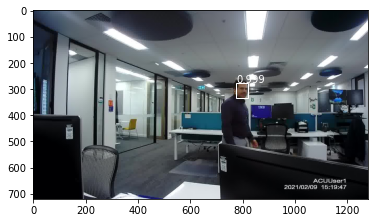

In [16]:
draw_boxes(image_path, out_boxes, out_conf)